In [35]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import os

In [28]:
#Fully Connected network를 이용하여 계산 결과가 픽셀이 28x28x1의 상황.
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" %(X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" %(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


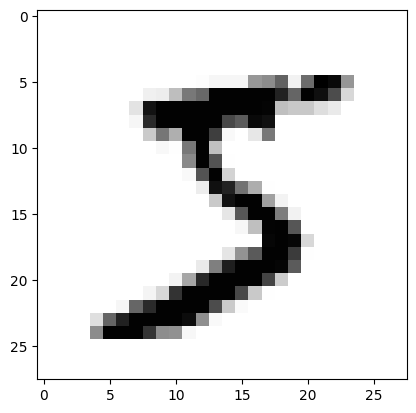

In [29]:
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [30]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [31]:
#28 x 28 784 pixel을 1차원으로 바꿔줘야 한다.
X_train =  X_train.reshape(-1,784).astype('float64')/255
X_test = X_test.reshape(-1,784).astype('float64')/255

#Class 값 확인, Class 5는 Categorial data이기 때문에 one-hot encoding으로 데이터를 저장해야한다.
print("Class : %d" %(Y_train[0]))

Class : 5


In [36]:
#바이너리화 과정
# 레이블을 원-핫 인코딩
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [41]:
#model 적용하기, fully connected network.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

MODEL_DIR = 'models/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

model_path = 'models/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [42]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs = 30, batch_size = 200, verbose = 0, callbacks = [early_stopping_callback,checkpointer])

print("\n Test Accuracy : %.4f"%model.evaluate(X_test,Y_test)[1])
#모델 저장이 7번째가 제일 성능이 좋다.


Epoch 1: val_loss improved from inf to 0.15021, saving model to models/01-0.1502.keras

Epoch 2: val_loss improved from 0.15021 to 0.11520, saving model to models/02-0.1152.keras

Epoch 3: val_loss improved from 0.11520 to 0.08116, saving model to models/03-0.0812.keras

Epoch 4: val_loss improved from 0.08116 to 0.07586, saving model to models/04-0.0759.keras

Epoch 5: val_loss improved from 0.07586 to 0.06629, saving model to models/05-0.0663.keras

Epoch 6: val_loss improved from 0.06629 to 0.06626, saving model to models/06-0.0663.keras

Epoch 7: val_loss improved from 0.06626 to 0.06019, saving model to models/07-0.0602.keras

Epoch 8: val_loss did not improve from 0.06019

Epoch 9: val_loss did not improve from 0.06019

Epoch 10: val_loss did not improve from 0.06019

Epoch 11: val_loss did not improve from 0.06019

Epoch 12: val_loss did not improve from 0.06019

Epoch 13: val_loss did not improve from 0.06019

Epoch 14: val_loss did not improve from 0.06019

Epoch 15: val_loss

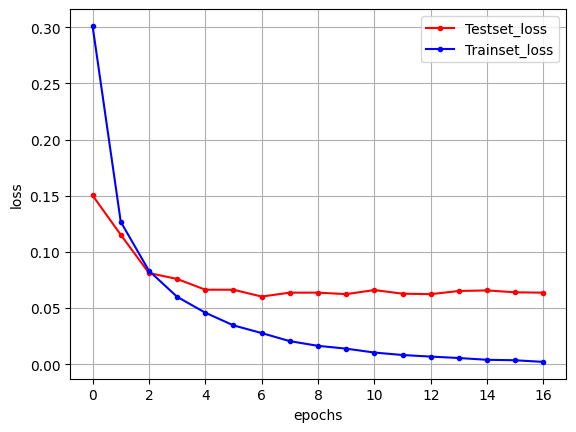

In [43]:
#테스트셋 오차
y_vloss = history.history['val_loss']
#학습셋 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss, marker = '.',color='red',label = 'Testset_loss')
plt.plot(x_len,y_loss, marker = '.',color='blue',label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()